In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

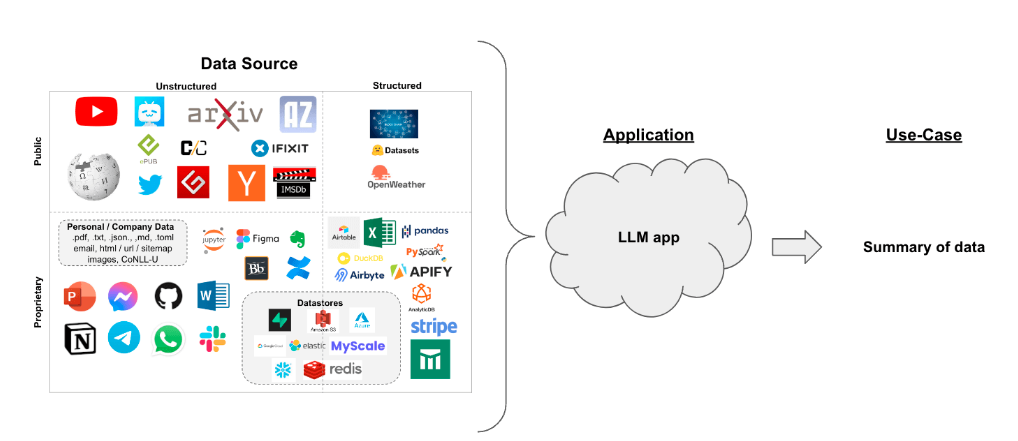

In [11]:
from langchain_groq import ChatGroq
api_key=os.getenv("GROQ_API_KEY")
llm=ChatGroq(groq_api_key=api_key,model="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001DA28EF1150>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001DA28EF2590>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [12]:
from langchain.schema import(
    AIMessage,
    HumanMessage,SystemMessage
)


In [13]:
speech="""
People across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.

In our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the government offices for this purpose. The government should reach him. Since you have assigned this responsibility to me, about four crore families have got their ‘pucca’ houses. However, I have encountered cases where someone is left out of the government benefits. Therefore, I have decided to tour the country again, to listen to people’s experiences with government schemes, to understand whether they received the intended benefits, and to ensure that the programs are reaching everyone as planned without paying any bribes. We will get the real picture if we visit them again. Therefore, this ‘Viksit Bharat Sankalp Yatra’ is, in a way, my own examination. I want to hear from you and the people across the country whether what I envisioned and the work I have been doing aligns with reality and whether it has reached those for whom it was meant.

It is crucial to check whether the work that was supposed to happen has indeed taken place. I recently met some individuals who utilized the Ayushman card to get treatment for serious illnesses. One person met with a severe accident, and after using the card, he could afford the necessary operation, and now he is recovering well. When I asked him, he said: “How could I afford this treatment? Now that there is the Ayushman card, I mustered courage and underwent an operation. Now I am perfectly fine.”  Such stories are blessings to me.

The bureaucrats, who prepare good schemes, expedite the paperwork and even allocate funds, also feel satisfied that 50 or 100 people who were supposed to get the funds have got it. The funds meant for a thousand villages have been released. But their job satisfaction peaks when they hear that their work has directly impacted someone’s life positively. When they see the tangible results of their efforts, their enthusiasm multiplies. They feel satisfied. Therefore, ‘Viksit Bharat Sankalp Yatra’ has had a positive impact on government officers. It has made them more enthusiastic about their work, especially when they witness the tangible benefits reaching the people. Officers now feel satisfied with their work, saying, “I made a good plan, I created a file, and the intended beneficiaries received the benefits.” When they find that the money has reached a poor widow under the Jeevan Jyoti scheme and it was a great help to her during her crisis, they realise that they have done a good job. When a government officer listens to such stories, he feels very satisfied.

There are very few who understand the power and impact of the ‘Viksit Bharat Sankalp Yatra’. When I hear people connected to bureaucratic circles talking about it, expressing their satisfaction, it resonates with me. I’ve heard stories where someone suddenly received 2 lakh rupees after the death of her husband, and a sister mentioned how the arrival of gas in her home transformed her lives. The most significant aspect is when someone says that the line between rich and poor has vanished. While the slogan ‘Garibi Hatao’ (Remove Poverty) is one thing, but the real change happens when a person says, “As soon as the gas stove came to my house, the distinction between poverty and affluence disappeared.
"""

In [14]:
speech

'\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the gove

In [15]:
chat_message=[
    SystemMessage(content="You are expert with experise in summarizing speeched"),
    HumanMessage(content=f"Please provide a short and concisse summary of the follow speech:\n Text:{speech}")
]

In [16]:
llm.get_num_tokens(speech)

909

In [17]:
## getting the summary
llm(chat_message)

AIMessage(content='This speech emphasizes the importance of ensuring government schemes reach their intended beneficiaries. \n\nThe speaker, a Member of Parliament, outlines their commitment to personally verifying the success of these programs through the "Viksit Bharat Sankalp Yatra" (Developed India Resolution Journey). They share anecdotes of individuals positively impacted by schemes like the housing program and Ayushman card, highlighting the tangible difference these initiatives make in people\'s lives.\n\nThe speaker also describes how this initiative motivates government officials by showcasing the direct impact of their work.  Ultimately, the speech celebrates the "Viksit Bharat Sankalp Yatra" as a tool for bridging the gap between policy and reality, demonstrating how government programs can effectively alleviate poverty and empower citizens. \n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 890, 'total_tokens': 1039, 'c

## Prompt Template Text Summarization

In [18]:
from langchain.chains import LLMChain
from langchain import PromptTemplate

generictemplate="""
Write a summary of the following speech:
Speech:{speech}
Translate the precise summary to {language}
"""

prompt=PromptTemplate(
    input_variables=['speech','language'],
    template=generictemplate
)
prompt

PromptTemplate(input_variables=['language', 'speech'], input_types={}, partial_variables={}, template='\nWrite a summary of the following speech:\nSpeech:{speech}\nTranslate the precise summary to {language}\n')

In [19]:
complete_prompt=prompt.format(speech=speech,language="French")
complete_prompt

'\nWrite a summary of the following speech:\nSpeech:\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses

In [20]:
llm.get_num_tokens(complete_prompt)

931

In [21]:
llm_chain=LLMChain(llm=llm,prompt=prompt)
summary=llm_chain.run({'speech':speech,'language':'hindi'})
summary

C:\Users\amitk\AppData\Local\Temp\ipykernel_35584\228696470.py:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain=LLMChain(llm=llm,prompt=prompt)
C:\Users\amitk\AppData\Local\Temp\ipykernel_35584\228696470.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  summary=llm_chain.run({'speech':speech,'language':'hindi'})


"यह भाषण 'विकसित भारत संकल्प यात्रा' की सफलता के लिए देशभर में लोगों, सरकार और राजनीतिक कार्यकर्ताओं की समर्पण की बात करता है। भाषणकर्ता, एक सांसद के रूप में, इस यात्रा में शामिल होने के लिए समर्पित हैं। \n\nवे बताते हैं कि भारत में कई योजनाएं और कार्यक्रम शुरू हुए हैं, लेकिन सबसे महत्वपूर्ण बात यह है कि योजनाओं का लाभ वास्तविक लाभार्थियों तक पहुँचे। उन्होंने 'प्रधानमंत्री आवास योजना' का उदाहरण दिया, जहाँ लाखों परिवारों को घरों का लाभ मिलना चाहिए, बिना किसी सरकारी दलदल के। यात्रा का उद्देश्य यह सुनिश्चित करना है कि योजनाएँ सभी तक पहुँचें और भ्रष्टाचार मुक्त हों। \n\nउनके अनुभवों में उन्होंने 'आयुष्मान कार्ड' के माध्यम से लोगों को लाभान्वित करने की कहानियाँ सुनीं हैं, जो गंभीर बीमारियों के उपचार में मदद कर रहे हैं।  \n\nभाषणकर्ता यह भी बताते हैं कि 'विकसित भारत संकल्प यात्रा' सरकारी अधिकारियों के बीच भी संतोष की भावना पैदा कर रही है, क्योंकि उन्हें अपने कार्यों के सीधे परिणाम देखने को मिल रहे हैं। \n\nएक महत्वपूर्ण बिंदु यह है कि लोगों को 'विकसित भारत' की भावना महसूस हो रही है, जहां गरी

## StuffDocumentChain Text summarization

In [22]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("apjspeech.pdf")
docs = loader.load_and_split()
docs

[Document(metadata={'producer': 'GPL Ghostscript 8.15', 'creator': 'PScript5.dll Version 5.2', 'creationdate': 'D:20070730160943', 'moddate': 'D:20070730160943', 'title': 'Microsoft Word - Document1', 'author': 'Shri', 'source': 'apjspeech.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth

In [23]:
template=""" Write a concise and short summary of the following speech,
Speech :{text}

 """
prompt=PromptTemplate(input_variables=['text'],
                      template=template)


In [24]:
from langchain.chains.summarize import load_summarize_chain

In [25]:
chain=load_summarize_chain(llm,chain_type='stuff',prompt=prompt,verbose=True)
output_summary=chain.run(docs)
output_summary



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
 Write a concise and short summary of the following speech,
Speech :A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those living abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online int

"This is A.P.J. Abdul Kalam's farewell speech delivered at the end of his five-year term as President of India. \n\nKalam reflects on his experiences and emphasizes the key takeaways from his interactions with people from all walks of life. He highlights ten core messages for India's future:\n\n1. **Accelerate Development:**  The youth aspire for a developed India, and their dreams should be the driving force.\n2. **Empower Villages:** Rural areas deserve development opportunities and better connectivity to unlock their potential.\n3. **Mobilize Rural Core Competence:** Leverage rural skills and resources for competitiveness through initiatives like PURA.\n4. **Seed to Food:**  Boost agricultural productivity through sustainable practices and empower farmers.\n5. **Defeat Problems and Succeed:**  Inspire resilience and perseverance by showcasing the triumph over adversity.\n6. **Overcome Problems Through Partnership:** Encourage collaboration and shared responsibility in overcoming cha

### Map reduce to Summarize Large documents

In [26]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [27]:
docs

[Document(metadata={'producer': 'GPL Ghostscript 8.15', 'creator': 'PScript5.dll Version 5.2', 'creationdate': 'D:20070730160943', 'moddate': 'D:20070730160943', 'title': 'Microsoft Word - Document1', 'author': 'Shri', 'source': 'apjspeech.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth

In [28]:
final_documents=RecursiveCharacterTextSplitter(chunk_size=2000,chunk_overlap=100).split_documents(docs)
final_documents


[Document(metadata={'producer': 'GPL Ghostscript 8.15', 'creator': 'PScript5.dll Version 5.2', 'creationdate': 'D:20070730160943', 'moddate': 'D:20070730160943', 'title': 'Microsoft Word - Document1', 'author': 'Shri', 'source': 'apjspeech.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth

In [29]:
len(final_documents)

13

In [30]:
chunks_prompt="""
Please summarize the below speech:
Speech:`{text}'
Summary:
"""
map_prompt_template=PromptTemplate(input_variables=['text'],
                                    template=chunks_prompt)

In [31]:
final_prompt='''
Provide the final summary of the entire speech with these important points.
Add a Motivation Title,Start the precise summary with an introduction and provide the summary in number 
points for the speech.
Speech:{text}

'''
final_prompt_template=PromptTemplate(input_variables=['text'],template=final_prompt)
final_prompt_template

PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='\nProvide the final summary of the entire speech with these important points.\nAdd a Motivation Title,Start the precise summary with an introduction and provide the summary in number \npoints for the speech.\nSpeech:{text}\n\n')

In [ ]:
summary_chain=load_summarize_chain(
    llm=llm,
    chain_type="map_reduce",
    map_prompt=map_prompt_template,
    combine_prompt=final_prompt_template,
    verbose=True
)

output=summary_chain.run(final_documents)
output



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Please summarize the below speech:
Speech:`A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those living abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have ma

Token indices sequence length is longer than the specified maximum sequence length for this model (2400 > 1024). Running this sequence through the model will result in indexing errors



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Provide the final summary of the entire speech with these important points.
Add a Motivation Title,Start the precise summary with an introduction and provide the summary in number 
points for the speech.
Speech:In his departing speech, A P J Abdul Kalam expresses gratitude for the past five years as President of India. 

He highlights his experiences interacting with diverse groups across the country and shares ten key messages:

1. **Accelerate development:** Driven by the aspirations of the youth.
2. **Empower villages**
3. **Mobilize rural talent** for national competitiveness.
4. **"Seed to Food":** Emphasizing the importance of agriculture.
5. **Defeat problems and succeed.**
6. **Overcome challenges through partnership.**
7. **Courage in facing calamities.**
8. **Connectivity:** Key to societal transformation.
9. **National defense:** A source of pride.
10. **Youth movement:** For a developed India by

'##  A Nation United:  A Vision for Progress\n\n**Introduction:** Dr. A.P.J. Abdul Kalam\'s departing speech as President of India is a powerful testament to his commitment to national development and unity. Drawing on his experiences, he outlines a clear vision for a developed India by 2020, emphasizing the role of youth, rural development, and collective action. \n\n**Key Points:**\n\n1. **Youth Empowerment:** Kalam recognizes the immense potential of India\'s youth and urges them to drive progress. He cites their aspirations and emphasizes the need for value-based education and leadership development.\n\n2. **Rural Transformation:**  Kalam stresses the importance of empowering villages, highlighting successful models like PURA (Providing Urban Amenities in Rural Areas). He advocates for financial autonomy, infrastructure improvements, and technology integration to bridge the rural-urban divide.\n\n3. **National Unity and Collaboration:** He calls for a united India, celebrating its 

: 

### Refine Chain For Summarization

In [43]:
chain=load_summarize_chain(
    llm=llm,
    chain_type="refine",
    verbose=True
)
output_summary=chain.run(final_documents)
output_summary



> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have man

'**Refined Summary:**\n\nFormer President A.P.J. Abdul Kalam expressed deep gratitude for the unwavering support received during his tenure and outlined his vision for accelerating development, empowering villages, strengthening agriculture, and fostering national unity. He emphasized the importance of mobilizing rural potential and achieving the "Developed India 2020" vision through partnerships.\n\nDuring his visit to Siachen Glacier, Kalam lauded the bravery and dedication of the Indian Armed Forces. He also interacted with members of the "Lead India 2020" movement, urging young citizens to embrace their role in national development.\n\nKalam emphasized the transformative potential of youth empowerment through initiatives like the Lead India 2020 program, highlighting its positive impact on self-discipline, values, and personal growth. He stressed the need for empowering the vast youth population in India through value-based education and leadership opportunities.\n\nFurthermore, Ka